23 65
(23, 17)
(23, 17)
(23, 17)
(23, 17, 3)


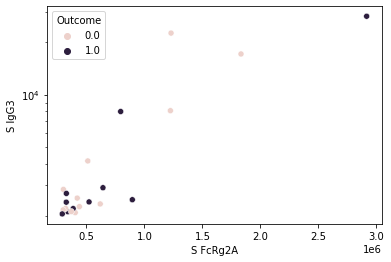

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
CovDataUrl = 'https://raw.githubusercontent.com/meyer-lab/sysSerol-COVID/main/Data%20File/CovData.csv'

def tensorView():
    Cov = pd.read_csv(CovDataUrl)
    r, c = Cov.shape
    print(r,c)

    SMat = Cov.iloc[:,13:c-1:3]
    RMat = Cov.iloc[:,14:c:3]
    NMat = Cov.iloc[:,15:c:3]

    print(np.shape(SMat))
    print(np.shape(RMat))
    print(np.shape(NMat))

    Tensor = np.dstack((SMat, RMat, NMat))
    print(np.shape(Tensor))

    Plot1 = sns.scatterplot(y="S IgG3", x="S FcRg2A", data=Cov, hue="Outcome")
    Plot1.set(yscale="log")
    return(Tensor)


Tensor = tensorView()


(22, 52)
Variance for each PC:  [0.46414895 0.1525981 ]


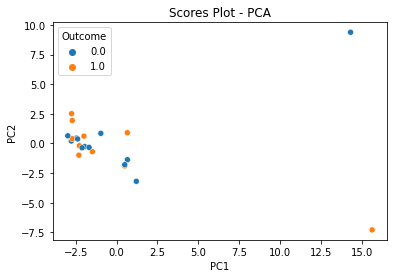

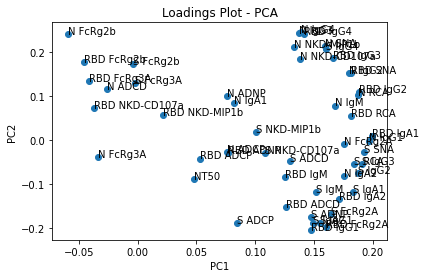

In [2]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from scipy import stats

Cov = pd.read_csv(CovDataUrl)
r, c = Cov.shape
Cov = Cov.drop(Cov.index[[r-1]])

Outcome = Cov['Outcome']
Outcome = Outcome.values

X = Cov.iloc[0:22,13:c]
variables = X.head(0)
X = X.values
print(X.shape)

PCAdata = scale(X)
pca = PCA(n_components=2)
scores = pca.fit_transform(PCAdata)
print("Variance for each PC: ", pca.explained_variance_ratio_)

sns.scatterplot(y=scores[:,1], x=scores[:,0], data=Cov, hue="Outcome")

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Scores Plot - PCA")

plt.figure()
loadings = pca.components_.T
plt.scatter(loadings[:,0], loadings[:,1])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Loadings Plot - PCA")

for i, txt in enumerate(variables):
    plt.annotate(txt, (loadings[i,0], loadings[i,1]))



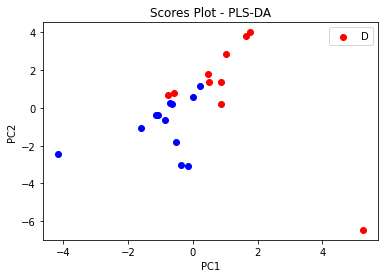

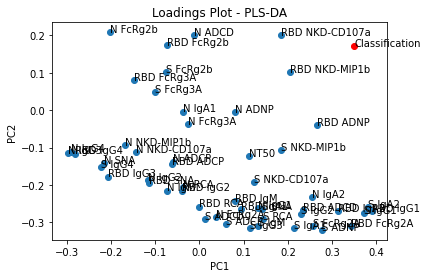

In [3]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.preprocessing import scale
Y = Outcome

plsr = PLSRegression(n_components=2)
plsr.fit_transform(X, Y)
y = plsr.predict(X)
xloading, yloading = plsr.x_loadings_, plsr.y_loadings_
xscore, yscore = plsr.x_scores_, plsr.y_scores_

for i in range(0, len(Y)):
    if Y[i] == 1:
        plt.scatter(xscore[i, 0], xscore[i, 1], c='r')
        plt.legend('D')
    elif Y[i] == 0:
        plt.scatter(xscore[i, 0], xscore[i, 1], c='b') 
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Scores Plot - PLS-DA')
plt.figure()

plt.scatter(xloading[:,0],xloading[:,1])
plt.scatter(yloading[:,0],yloading[:,1], c='r')
plt.annotate('Classification', (yloading[:, 0], yloading[:, 1]))
plt.xlabel("PC1")
plt.ylabel('PC2')
plt.title('Loadings Plot - PLS-DA')
for i, txt in enumerate(variables):
    plt.annotate(txt, (xloading[i,0], xloading[i,1]))